In [16]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

In [84]:
data = pd.read_csv("./data/data.csv")
print(data)

      x
0    88
1    84
2    85
3    85
4    84
..  ...
95  222
96  228
97  226
98  222
99  220

[100 rows x 1 columns]


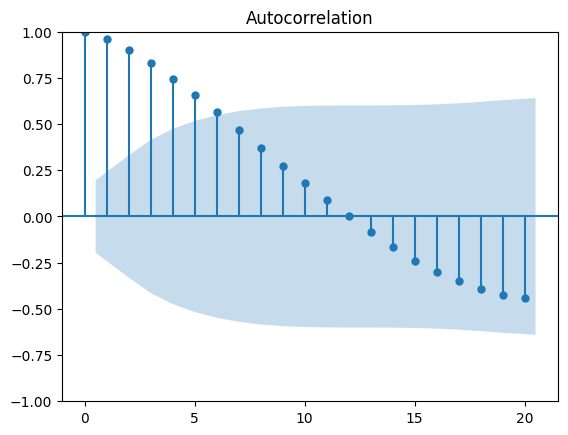

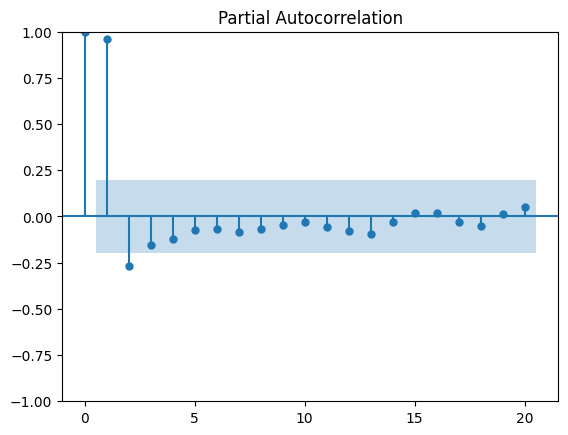

In [85]:
# a) Identify ARIMA Order (p, d, q)
plot_acf(data)
plot_pacf(data)
plt.show()  # Visually inspect the plots to determine p, d, q

In [86]:
# creating training and test data set
size = int(len(data) * 0.8)
trainData, testData = data[0:size], data[size: len(data)]
print(trainData, testData)

      x
0    88
1    84
2    85
3    85
4    84
..  ...
75   91
76   91
77   94
78  101
79  110

[80 rows x 1 columns]       x
80  121
81  135
82  145
83  149
84  156
85  165
86  171
87  175
88  177
89  182
90  193
91  204
92  208
93  210
94  215
95  222
96  228
97  226
98  222
99  220


In [91]:
# b) Model estimation
# Replace with identified order based on ACF/PACF analysis
model = ARIMA(trainData, order=(1, 2, 3))  # Example order, adjust based on your analysis
modelFit = model.fit()
print(modelFit.summary())

                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                   80
Model:                 ARIMA(1, 2, 3)   Log Likelihood                -201.876
Date:                Wed, 10 Jan 2024   AIC                            413.752
Time:                        16:17:06   BIC                            425.535
Sample:                             0   HQIC                           418.469
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2476      0.399     -0.620      0.535      -1.030       0.535
ma.L1          0.4652      0.385      1.209      0.227      -0.289       1.220
ma.L2         -0.3124      0.108     -2.883      0.0

In [92]:
# c) Model evaluation (assuming you have a test set)
forecast = modelFit.forecast(steps=len(testData))
mse = mean_squared_error(testData, forecast)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 274.0694145429815
RMSE: 16.555041967418312


In [93]:
# d) Forecasting
forecast = pd.Series(forecast, index=testData.index)  # Assuming you want the index to match the last n_periods_to_forecast of the original data
print(forecast)

80    117.465334
81    123.474965
82    129.002630
83    134.649618
84    140.267065
85    145.891825
86    151.514775
87    157.138173
88    162.761460
89    168.384774
90    174.008082
91    179.631391
92    185.254700
93    190.878009
94    196.501318
95    202.124627
96    207.747936
97    213.371245
98    218.994554
99    224.617863
Name: predicted_mean, dtype: float64


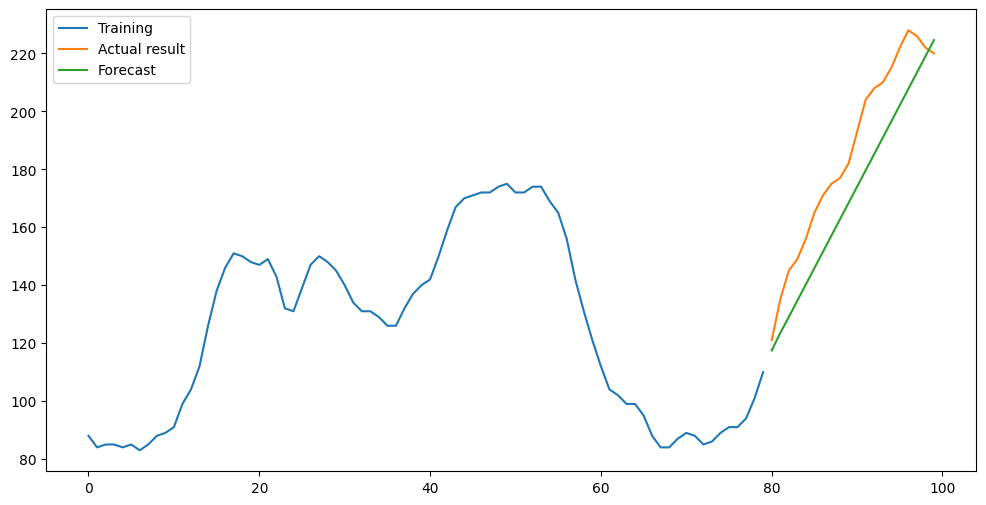

In [94]:
# Visualization with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(trainData, label="Training")
plt.plot(testData, label="Actual result")
plt.plot(forecast, label="Forecast")
plt.legend()
plt.show()